In [31]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

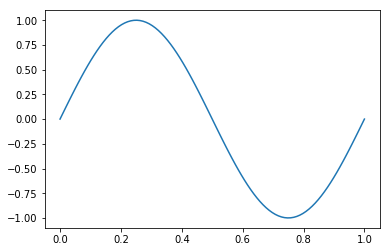

In [46]:
x, t = np.linspace(0,1,100), [0]
p0 = np.sin(2.*math.pi*x)
plt.plot(x, p0)
plt.show()

In [47]:
from nangs.vars import IndependentVar, DependentVar

_x = IndependentVar('x', x.tolist())
_t = IndependentVar('t', t)
_p = DependentVar('p', p0.tolist())
inputs = [_x, _t]
outputs = [_p]

In [48]:
from nangs.bocos.dirichlet_boco import DirichletBocoDataset

dataset = DirichletBocoDataset(inputs, outputs)

In [50]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=100, shuffle=False, num_workers=4)

In [51]:
from nangs.pde.solution import Solution

model = Solution(2,1,5,32,'relu')
model

Solution(
  (activation): ReLU(inplace)
  (fc_in): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU(inplace)
  )
  (fc_hidden): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU(inplace)
    )
    (1): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU(inplace)
    )
    (2): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU(inplace)
    )
    (3): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU(inplace)
    )
    (4): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU(inplace)
    )
  )
  (fc_out): Linear(in_features=32, out_features=1, bias=True)
)

In [52]:
import torch

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [68]:
epochs = 30
for epoch in range(epochs):
    total_loss = []
    for input, output in dataloader:
        pred = model(input)
        loss = (pred-output).pow(2).mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss.append(loss.data)
    print('Epoch: {}, Loss: {} '.format(epoch, np.array(total_loss).mean()))

Epoch: 0, Loss: 3.248499342589639e-05 
Epoch: 1, Loss: 9.298441000282764e-05 
Epoch: 2, Loss: 8.447620348306373e-05 
Epoch: 3, Loss: 2.4829525500535965e-05 
Epoch: 4, Loss: 1.514723408035934e-05 
Epoch: 5, Loss: 5.829213478136808e-05 
Epoch: 6, Loss: 6.709596345899627e-05 
Epoch: 7, Loss: 2.913634125434328e-05 
Epoch: 8, Loss: 7.597904186695814e-06 
Epoch: 9, Loss: 2.7326648705638945e-05 
Epoch: 10, Loss: 4.394458665046841e-05 
Epoch: 11, Loss: 3.0303264793474227e-05 
Epoch: 12, Loss: 8.788399100012612e-06 
Epoch: 13, Loss: 1.1745685696951114e-05 
Epoch: 14, Loss: 2.749568739091046e-05 
Epoch: 15, Loss: 2.8332535293884575e-05 
Epoch: 16, Loss: 1.4075015315029304e-05 
Epoch: 17, Loss: 6.0506322370201815e-06 
Epoch: 18, Loss: 1.2130386494391132e-05 
Epoch: 19, Loss: 2.109043452946935e-05 
Epoch: 20, Loss: 1.9578703359002247e-05 
Epoch: 21, Loss: 1.0263673175359145e-05 
Epoch: 22, Loss: 4.768233793583931e-06 
Epoch: 23, Loss: 8.371074727619998e-06 
Epoch: 24, Loss: 1.4302716408565175e-05 

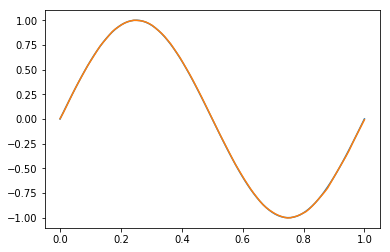

In [69]:
p = []
for i in range(len(dataset)):
    input, _ = dataset[i]
    p.append(model(input))
    
plt.plot(x,p0)
plt.plot(x,p)
plt.show()